<a href="https://colab.research.google.com/github/anjanadlp/Datascience_NLP/blob/master/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Movie Review***

- This project focuses on sentiment analysis using an IMDB movie review dataset, aiming to classify reviews as positive or negative.

- By leveraging machine learning models such as Logistic Regression, Multinomial Naive Bayes, and Linear SVC, this study explores their performance in accurately predicting sentiments.

- The analysis provides valuable insights into the applicability of NLP techniques in real-world text-based data classification tasks.

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Project/IMDB Dataset.csv')

In [ ]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df.tail()

review sentiment
1607  The movie follows the events of the novel "Cel...  positive
1608  If it weren't for the editing out of curse wor...  negative
1609  I have seen The Running Man several times as I...  positive
1610  A stuttering plot, uninteresting characters an...  negative
1611  Yes, this movie is a real thief. It stole some...  negative

In [ ]:
df.shape

(1612, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df['review'].value_counts()

review
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.    1
Ahh, nuthin' like cheesy, explopitative, semi-porn, masquerading as horror...This one stars Jaqueline Lovell(sometimes Sara St. James), the nubile starlet also seen in "Femalien", "The Erotic House of Wax", and that family favorite "Nude Bowling Party". She is now a fixture in Surrender Cinema's line-up of talentless cuties starring in pointless, soft-porn exploitation flicks. "Head of the Family" actually tries to be a real moovie. A con-man and a tramp try to get said-tramp's husband off-ed. They turn to a large-brained evil genius in a wheelchair, and his family of moronic misfits, who uses mind control to send out zombies to do his nefarious bidding. Said-genius has a giant head, hence the clever title of the film: that's about the extent of the film's humor. But basically, it's an excuse to show off the ample talents of Lovell and Dianne Colazzo (Ernestina). Laced with some of the wierdest dialogue can be herd (what the heck is "plowing oats", anycow??), and just plain stupid, this titular thriller will moost likey appeal to the breast-cownters of Drive-In Theater, but no one else. The MooCow says avoid the devoid, unless yer looking for a rent on cheesy T&A/horror night. :=8P                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1
Lovely Candace Bergen as the widow Perdicaris are kidnapped and held for ransom by the Sheik Raisuli played by one dashing Sean Connery. The incident comes during 1904 as Theodore Roosevelt runs for election to the presidency in his own right. Needing a good example to show off the muscular foreign policy of the United States, Brian Keith as Roosevelt issues a stunning declaration to the Sultan of Morocco, "Perdicaris alive or Raisuli dead."<br /><br />Bu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1612 non-null   object
 1   sentiment  1612 non-null   object
dtypes: object(2)
memory usage: 25.3+ KB


In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
text = df['review']

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:
text1=[]

In [ ]:
for txt in df['review']:
    # Convert to lowercase
    txt = txt.lower()
    # Remove <br> tags
    txt = re.sub(r'<br\s*/?>', ' ', txt)
    # Remove special characters and digits
    txt = re.sub(r'\W', ' ', txt)
    txt = re.sub(r'\d', ' ', txt)
    # Remove extra spaces
    txt = re.sub(r'\s+', ' ', txt).strip()
    # Append cleaned text to text1
    text1.append(txt)


In [ ]:
text1

['one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty 

In [ ]:
text=pd.Series(text1)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text = text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [ ]:
text

0       one the other reviewers has mentioned that aft...
1       wonderful little production the filming techni...
2       thought this was wonderful way spend time too ...
3       basically there family where little boy jake t...
4       petter mattei love the time money visually stu...
                              ...                        
1607    the movie follows the events the novel cel mai...
1608    weren for the editing out curse words and supe...
1609    have seen the running man several times stephe...
1610    stuttering plot uninteresting characters and s...
1611    yes this movie real thief stole some shiny osc...
Length: 1612, dtype: object

In [ ]:
# lowecase conversion and normalization(convert in to root form or cut the tail part)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
text = text.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
text

0       one the other review has mention that after wa...
1       wonder littl product the film techniqu veri un...
2       thought this was wonder way spend time too hot...
3       basic there famili where littl boy jake think ...
4       petter mattei love the time money visual stun ...
                              ...                        
1607    the movi follow the event the novel cel mai iu...
1608    weren for the edit out curs word and superimpo...
1609    have seen the run man sever time stephen king ...
1610    stutter plot uninterest charact and sub par sa...
1611    yes this movi real thief stole some shini osca...
Length: 1612, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [ ]:
text

0       one review mention watch episod hook right exa...
1       wonder littl product film techniqu veri unassu...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
1607    movi follow event novel cel mai iubit dintr pa...
1608    edit curs word superimpos blur one charact giv...
1609    seen run man sever time stephen king fan movi ...
1610    stutter plot uninterest charact sub par say le...
1611    yes movi real thief stole shini oscar avatar b...
Length: 1612, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data_vec = vec.fit_transform(text)

In [ ]:
print(train_data_vec)

  (0, 9317)	0.02371450363969758
  (0, 11023)	0.053167057326050024
  (0, 8344)	0.05480823005788904
  (0, 14495)	0.0882848795599171
  (0, 4281)	0.11682474813711238
  (0, 6212)	0.07783003473716803
  (0, 11081)	0.09413523959658862
  (0, 4416)	0.06293992620944153
  (0, 5815)	0.048927575603329714
  (0, 4772)	0.07186816074752075
  (0, 13340)	0.036629317584537475
  (0, 12783)	0.17398564558720364
  (0, 1700)	0.07663380408104038
  (0, 13924)	0.1046077096534081
  (0, 11517)	0.035054714695172975
  (0, 14323)	0.24994806257004903
  (0, 11758)	0.04485498029554036
  (0, 14790)	0.10882637508829009
  (0, 13698)	0.07913041149367907
  (0, 11934)	0.15647495287600813
  (0, 4538)	0.1046077096534081
  (0, 5934)	0.0560601629958881
  (0, 13438)	0.10890709087485234
  (0, 10434)	0.06686093519764891
  (0, 10444)	0.07846608412830536
  :	:
  (1611, 6338)	0.1391056392158391
  (1611, 539)	0.092467992043558
  (1611, 5271)	0.11428714782722235
  (1611, 9398)	0.1263179410129466
  (1611, 10087)	0.12692715815158712
  (1611,

In [ ]:
train_data_vec.shape

(1612, 15010)

In [ ]:
type(train_data_vec)

scipy.sparse._csr.csr_matrix

In [ ]:
y = df['sentiment'].values

In [ ]:
y

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data_vec,y,test_size=0.2,random_state=0)

<ipython-input-32-4da4a61d1a08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


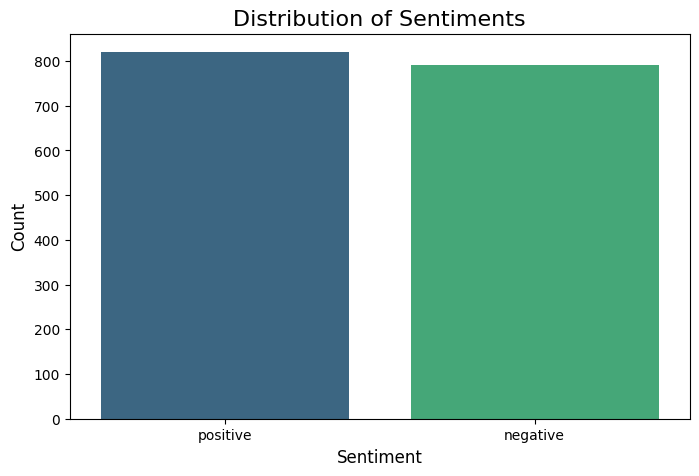

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

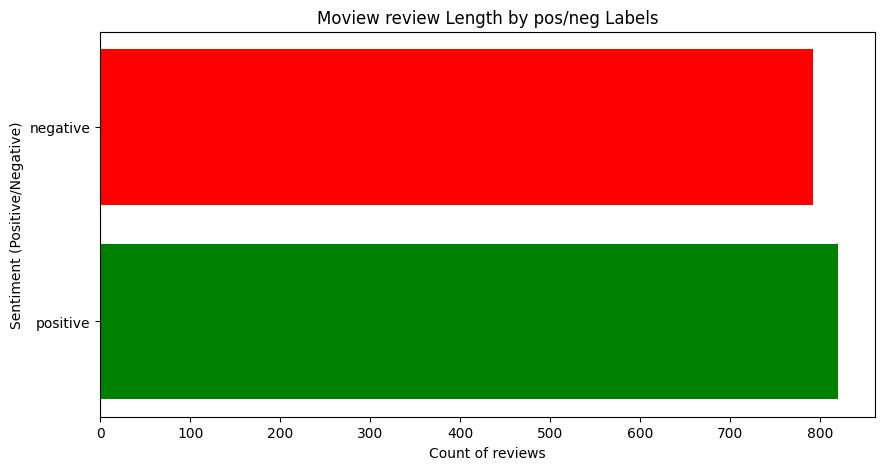

In [ ]:
#Horizontal bar

plt.figure(figsize=(10, 5))
plt.barh(y=df['sentiment'].value_counts().index, width=df['sentiment'].value_counts(), height=0.8, color=['green', 'red'])
plt.title("Moview review Length by pos/neg Labels")
plt.xlabel("Count of reviews")
plt.ylabel("Sentiment (Positive/Negative)")
plt.show()

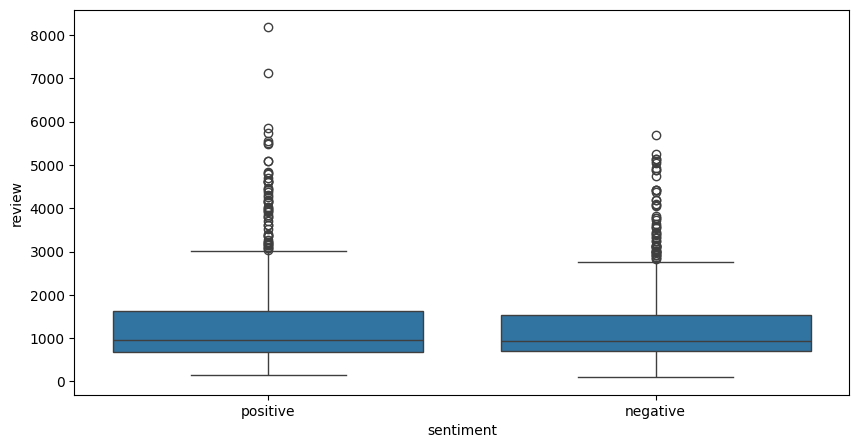

In [ ]:
#Box plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['sentiment'],y=df['review'].str.len())
plt.show()

<ipython-input-43-559e5901aa8f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['sentiment'], y=df['review'].str.len(), ci=None)


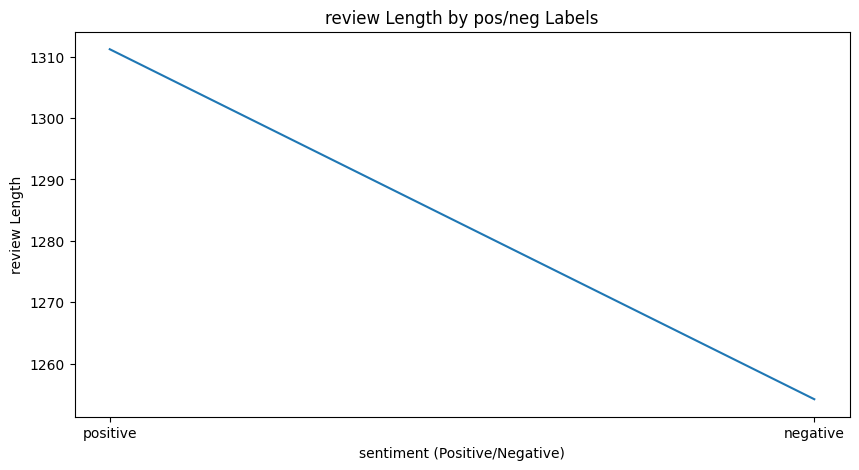

In [ ]:
#lineplot

plt.figure(figsize=(10, 5))
sns.lineplot(x=df['sentiment'], y=df['review'].str.len(), ci=None)
plt.title("review Length by pos/neg Labels")
plt.xlabel("sentiment (Positive/Negative)")
plt.ylabel("review Length")
plt.show()


MODEL EVALUATION OF

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8421052631578947

In [ ]:
x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test,x_test_pred)
test_accuracy

0.8421052631578947

In [ ]:
import numpy as np


MODEL EVALUATION OF

MultinomialNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

model1.fit(x_train,y_train)


MultinomialNB()

In [ ]:
y_pred1 = model.predict(x_test)
y_pred1

array(['positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8421052631578947

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix

array([[130,  40],
       [ 11, 142]])

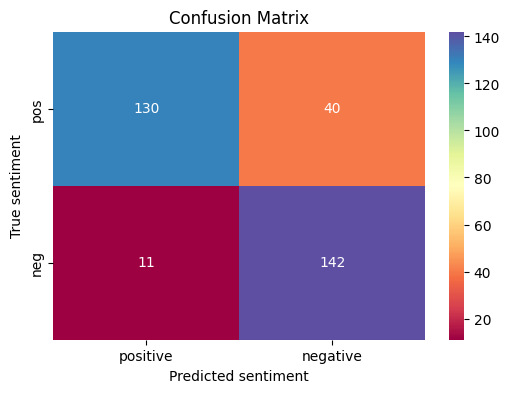

In [ ]:
#Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Spectral", xticklabels=['positive', 'negative'], yticklabels=['pos', 'neg'])
plt.xlabel("Predicted sentiment")
plt.ylabel("True sentiment")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred_nb = nb_model.predict(x_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8173374613003096


MODEL EVALUATION OF

LinearSVC

In [ ]:
import pandas as pd

results = {
    'Model': ['Logistic Regression', 'MultinomialNB','Linear SVC'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred_nb)]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.842105
1        MultinomialNB  0.842105
2           Linear SVC  0.817337


<ipython-input-54-c9bec4d3bcd1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


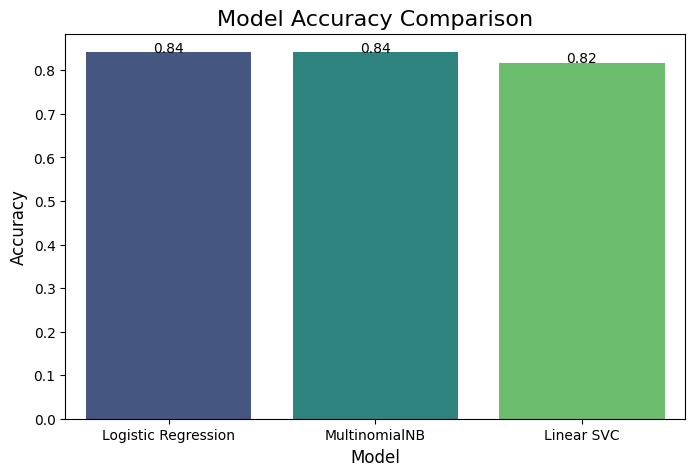

In [ ]:

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

for index, row in results_df.iterrows():
    plt.text(index, row['Accuracy'], f"{row['Accuracy']:.2f}", color='black', ha="center")

plt.show()


In [ ]:
# New prediction
sample = "The movie was a letdown with a predictable plot, poorly developed characters, and dull visuals. The pacing dragged, and the performances felt uninspired. Overall, it lacked originality and failed to engage."

In [ ]:
print("The result of sample message :  " ,model.predict(vec.transform([sample])))

The result of sample message :   ['negative']


In [ ]:
# New prediction
sample = "A visually stunning masterpiece that captivates with its heartfelt storytelling and exceptional performances. A must-watch for anyone who loves cinema!"

In [ ]:
print("The result of sample message :  " ,model.predict(vec.transform([sample])))

The result of sample message :   ['positive']


***Conclusion***


- This project successfully demonstrates the power of NLP techniques in processing and analyzing textual data for sentiment classification.

- Through a detailed evaluation of Logistic Regression, Multinomial Naive Bayes, and Linear SVC models, the study highlights their strengths and limitations.

- Among these, LogisticRegression() stood out as the most effective, achieving the highest accuracy.

- These findings underscore the potential of machine learning in deriving actionable insights from text data, paving the way for further advancements in sentiment analysis.

